In [ ]:
from stat import filemode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import re
import random
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import dump, load

In [ ]:
# Label-to-letter dictionary
LABEL_TO_LETTER = {
    0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f',
    6: 'g', 7: 'h', 8: 'i', 9: 'k', 10: 'l', 11: 'm',
    12: 'n', 13: 'o', 14: 'p', 15: 'q', 16: 'r', 17: 's',
    18: 't', 19: 'u', 20: 'v', 21: 'w', 22: 'x', 23: 'y'
}

# Inverse dictionary (optional, could be useful later)
LETTER_TO_LABEL = {v: k for k, v in LABEL_TO_LETTER.items()}

# General project path (relative path)
project_path = os.path.join('train')  # Assumes a folder "train/" exists in the current directory

# Import images and labels
images = []
labels = []

for filename in os.listdir(project_path):
    if filename.startswith('.'):
        continue  # Skip hidden files

    filepath = os.path.join(project_path, filename)
    basename = os.path.splitext(filename)[0]  # Get filename without extension
    first_char = basename[0].lower()

    if first_char in LETTER_TO_LABEL:
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
            labels.append(LETTER_TO_LABEL[first_char])

labels = np.array(labels)
images = np.array(images)

print('Labels shape:', labels.shape)
print('Images shape:', images.shape)

# Compute HOG features
hog_features = []
for img in images:
    fd = hog(
        img,
        orientations=9,
        pixels_per_cell=(15, 15),
        cells_per_block=(2, 2),
        block_norm='L2-Hys'
    )
    hog_features.append(fd)

hog_features = np.array(hog_features)
print('HOG feature array shape:', hog_features.shape)

# Split into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(
    hog_features, labels, train_size=0.8, test_size=0.2, random_state=1
)

print('Training set shape:', X_train.shape, Y_train.shape)
print('Validation set shape:', X_val.shape, Y_val.shape)

(960,)
(1, 17100)
(960, 17100)
(768, 17100)
(768,)


In [27]:
print('Training model')
#l2 penalty,loss: squared hinge
#training SVM model
clf = SVC(kernel='linear').fit(X_train,Y_train)

#saving model
dump(clf,'hog_test.joblib')

#predicting test and validation data
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_val)

print('Training Accuracy')
print(accuracy_score(Y_train,y_pred_train))
print('Validation Accuracy')
print(accuracy_score(Y_val,y_pred_val))

Training model
Training Accuracy
1.0
Validation Accuracy
0.671875


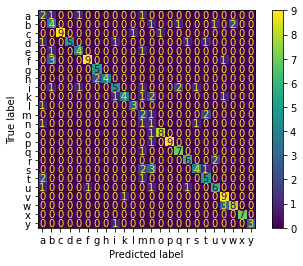

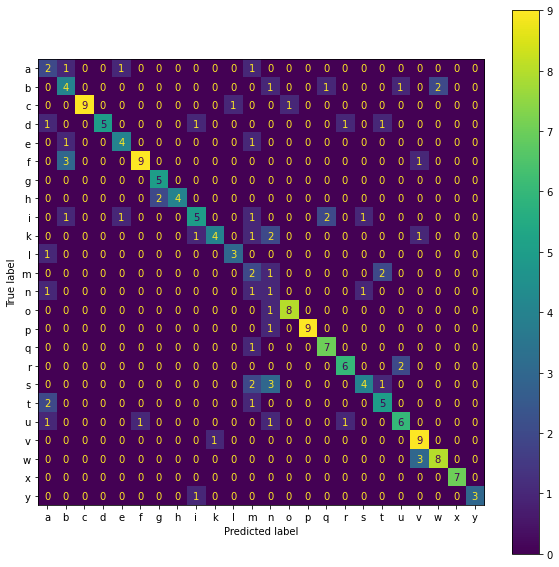

In [ ]:
#compute confusion matrix for validation data
from sklearn.metrics import ConfusionMatrixDisplay

ALPHABET_LIST = [
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
    't', 'u', 'v', 'w', 'x', 'y'
]

cmp = ConfusionMatrixDisplay.from_estimator(clf,X_val,Y_val,display_labels=ALPHABET_LIST)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)